## Natural Language Project - SVM

## A. Input Data

#### In this step we will import the data set with name news-data.csv with the number of rows is 32602 news

In [1]:
# import library
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 

news_data = pd.read_csv("./news-data.csv") # read data
del news_data['Unnamed: 0'] # delete number of news rows
print (len(news_data)) # count news
news_data.head() 
news_data.count() #count based on attribute

32602


content     32602
url         32602
label       32602
time        32602
urllabel    32602
category    32602
dtype: int64

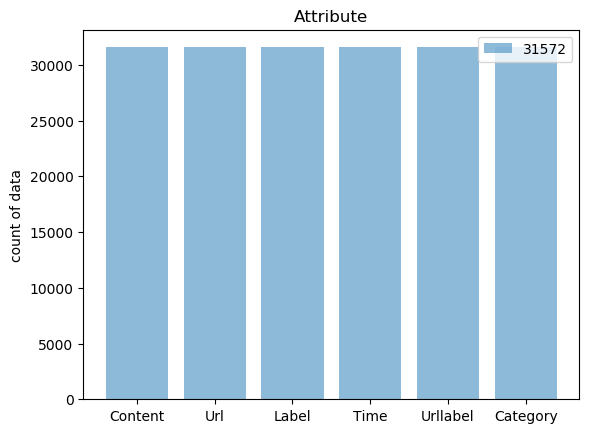

In [23]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Content', 'Url', 'Label', 'Time', 'Urllabel', 'Category')
y_pos = np.arange(len(objects))
performance = [len(news_data.content),len(news_data.url),len(news_data.label),len(news_data.time),len(news_data.urllabel),len(news_data.category)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count of data')
plt.title('Attribute')
plt.legend(performance)
 
plt.show()

#### Print data-news.csv and we will see the sample of data

In [3]:
news_data # print data

content  \
0      court agrees to expedite n.f.l.'s appeal the d...   
1      no tsunami but fifa's corruption storm rages o...   
2      chung backs bin hammam in fifa presidential ra...   
3      rory mcilroy hangs on to slim lead at augusta ...   
4      bartoli beats ivanovic to reach last four at i...   
5      wozniacki reaches semis after azarenka injury ...   
6      wozniacki and sharapova to meet in semis top s...   
7      rays 6, yankees 5: amid tension, yanks' slump ...   
8      roundup: durant and westbrook lead thunder to ...   
9      sports briefing | tennis: french open singles ...   
10     making a case for each team to cut down the ne...   
11     morneau strokes double in return from concussi...   
12     bradley picks u.s. roster for march friendlies...   
13     picking a qb at no. 1 in nfl draft can be a ro...   
14     figure skating: south korean skater stumbles, ...   
15     kenseth ends drought with victory in texas mat...   
16     on soccer: a world-class talent is facing a cr...   
17     giants closer wilson to have tests on strained...   
18     mike brown to the lakers: brilliant choice or ...   
19     with blues for sale, checketts admits the dodg...   
20     late 14-0 run lifts heat to 2-0 lead over celt...   
21     djokovic downs del potro to go 40-0 in 2011 no...   
22     country could have 2 reasons to brag if rory m...   
23     soderling silences crowd at french open with w...   
24     blues draw fans, but now need an owner dave ch...   
25     ryan kesler's tiebreaker gives canucks 3-1 lea...   
26     police: cabrera threatened to 'kill all of you...   
27     bahrain f1 grand prix is "not on", says eccles...   
28     walker gets help, uconn edges arizona for spot...   
29     blatter says hammam win would leave fifa in 'b...   
...                                                  ...   
32572  'mass effect 3' release pushed back to 2012 bi...   
32573  explosion at china ipad factory highlights lax...   
32574  netflix cuts data use on canada online service...   
32575  shuttle endeavour begins final mission shuttle...   
32576  soyuz space capsule launch faces delays: repor...   
32577  space shuttle endeavor returns to earth the sh...   
32578  from a special-ed class, solar evangelists a g...   
32579  ipad resellers camping out at apple stores as ...   
32580  intel unveils laptops that include tablet feat...   
32581  new rules to let europe web users turn off coo...   
32582  netflix cuts data use on canada online service...   
32583  clearwire signs network deal with ericsson cle...   
32584  art review: a muse in the machine: click. crea...   
32585  sands, not lights, cover gaza archaeology site...   
32586  in 'homefront,' war gets up close and personal...   
32587  at&#38;t launches its first prepaid smartphone...   
32588  friday shuttle launch drawing sky-high interes...   
32589  downloadable content can be yours, temporarily...   
32590  toshiba in discussions to buy landis & gyr aft...   
32591  climb into the ring with 'fight night champion...   
32592  analysis: ti-natsemi deal vaults analog back i...   
32593  in polar bear territory scientists counting bo...   
32594  google earth optimized for android tablets goo...   
32595  observatory: monkeys' memories can stretch bey...   
32596  electricity from microbes a step closer: study...   
32597  science and the race for the south pole in tim...   
32598  burglars target apple stores apple stores, ren...   
32599  u.s.-russian crew blast off for space station ...   
32600  google delays open access to new android softw...   
32601  underpinnings of the internet shift at the e-g...   

                                                     url  label  \
0      http://feeds1.nytimes.com/~r/nyt/rss/sports/~3...      0   
1      http://feeds.reuters.com/~r/reuters/sportsnews...      0   
2      http://feeds.reuters.com/~r/reuters/sportsnews...      0   
3      http://feeds.reuters.com/~r/reuters/sportsnews...    

#### We got a sample of data, but the data still dirty. What dirty data ? It is data that have a redundant or duplicate item, incomplete or missing value, etc. We can't use that dirty data so we have to clean the data with data preprocessing

## B. Data Preprocessing

#### 1. Remove Duplicate Data

In [4]:
news_data=news_data[~news_data['content'].duplicated()] # remove the duplicate using duplicated() function
news_data=news_data.reset_index(drop=True)
print (len(news_data)) # count total of news after deleting duplicate data [32602 -> 31572]
print (news_data.content[0]) # print news in array [0] for example
news_data.head()

31572
court agrees to expedite n.f.l.'s appeal the decision means a ruling could be made nearly two months before the regular season begins, time for the sides to work out a deal without delaying the season.


content  \
0  court agrees to expedite n.f.l.'s appeal the d...   
1  no tsunami but fifa's corruption storm rages o...   
2  chung backs bin hammam in fifa presidential ra...   
3  rory mcilroy hangs on to slim lead at augusta ...   
4  bartoli beats ivanovic to reach last four at i...   

                                                 url  label            time  \
0  http://feeds1.nytimes.com/~r/nyt/rss/sports/~3...      0   5/4/2011 7:39   
1  http://feeds.reuters.com/~r/reuters/sportsnews...      0  6/7/2011 17:54   
2  http://feeds.reuters.com/~r/reuters/sportsnews...      0  4/5/2011 20:44   
3  http://feeds.reuters.com/~r/reuters/sportsnews...      0  4/10/2011 1:26   
4  http://feeds.reuters.com/~r/reuters/sportsnews...      0  3/17/2011 0:11   

  urllabel category  
0      nyt    sport  
1  reuters    sport  
2  reuters    sport  
3  reuters    sport  
4  reuters    sport

#### 2. Lower Case Process

In [5]:
content = news_data.content
new_sentence = [word.lower() for word in content] # lower case process using lower() function
new_sentence

["court agrees to expedite n.f.l.'s appeal the decision means a ruling could be made nearly two months before the regular season begins, time for the sides to work out a deal without delaying the season.",
 'no tsunami but fifa\'s corruption storm rages on though jack warner\'s threatened soccer "tsunami" remains stuck in the doldrums, the corruption storm raging around fifa shows no sign of abating after another extraordinary week for the game\'s governing body.',
 'chung backs bin hammam in fifa presidential race mohamed bin hammam received a boost to his campaign to become fifa president when he was backed by his former foe and ex-fifa executive committee member chung mong-joon tuesday.',
 "rory mcilroy hangs on to slim lead at augusta britain's rory mcilroy was clinging to a one-shot lead midway through the third round at the masters on saturday as the challengers started to make their move.",
 'bartoli beats ivanovic to reach last four at indian wells marion bartoli of france reac

#### 3. Remove Punctuation and Number

In [6]:
# import library
import string
from string import digits
string.punctuation
new_sentences = []

for words in new_sentence:
    for punctuation in string.punctuation:
        words = words.replace(punctuation, "") # remove punctuation
    for number in '1234567890':
        words = words.replace(number, "") # remove number
    print (words)
    new_sentences.append(words)

court agrees to expedite nfls appeal the decision means a ruling could be made nearly two months before the regular season begins time for the sides to work out a deal without delaying the season
no tsunami but fifas corruption storm rages on though jack warners threatened soccer tsunami remains stuck in the doldrums the corruption storm raging around fifa shows no sign of abating after another extraordinary week for the games governing body
chung backs bin hammam in fifa presidential race mohamed bin hammam received a boost to his campaign to become fifa president when he was backed by his former foe and exfifa executive committee member chung mongjoon tuesday
rory mcilroy hangs on to slim lead at augusta britains rory mcilroy was clinging to a oneshot lead midway through the third round at the masters on saturday as the challengers started to make their move
bartoli beats ivanovic to reach last four at indian wells marion bartoli of france reached her third semifinal of the year with

american watney wins wgccadillac championship american nick watney kept his cool to win the wgccadillac championship on sunday by two strokes over compatriot dustin johnson for the biggest win of his career
american watney wins wgccadillac championship american nick watney kept his cool to win the wgccadillac championship sunday by two strokes over compatriot dustin johnson for the biggest win of his career
predators  canucks  nashville denies vancouver ward and legwand score pair vancouver must return to nashville to try to close out the series in six games
giants pablo sandoval out  weeks with broken wrist san francisco giants third baseman pablo sandoval broke a bone in his right wrist and is expected to miss four to six weeks adding to the concerns 
wakefield cracks knuckles ahead of milestone appearance tim wakefield is a rare breed in major league baseball and the boston red sox knuckleballer will set a new milestone the next time he takes to the mound by becoming the oldest play

mens roundup duke adds another title to packed trophy case nolan smith had  points and fifthranked duke ended no  north carolinas run of big comebacks at the atlantic coast conference tournament beating the tar heels  in sundays final in greensboro nc
mavericks bounce back to win game  vs trail blazers tyson chandler is the active energetic big man the dallas mavericks have never had before hes also a pretty good strategist
sports of the times burress will soon be free to redefine himself with plaxico burresss release from prison on monday the immediate questions focus on where and how successfully he will resume his nfl career
tyler zeller john henson pass up nba to stay at north carolina north carolina made it to the elite eight last month its chances of making the final four got a big boost when forwards tyler zeller and john 
perry hills unique drills give marlins defensive edge perry hill has a gold glove in his home near dallas though he never played a game of major league baseba

fish wins at key biscayne earns status as top us man mardy fish has claimed the no  american ranking in mens tennis by reaching the semifinals at the sony ericsson open
prado jurrjens lead braves past reds jair jurrjens outpitched johnny cueto martin prado hit a tworun homer and the atlanta braves beat cincinnati  on sunday night to end the 
roundup rays ease a few concerns by adding to bostons the rays who led for only two innings all season jumped ahead early and never looked backin a  win over the red sox
riesch edges ahead of vonn in overall world cup race lindsey vonn lost the lead for the overall world cup title friday and trails maria riesch by three points after the german finished fourth in 
chicago news cooperative  sports with or without stars the bulls may go far some say the bulls are too young and untested to win the title but with tom thibodeau as coach all the team has done so far in  is win
thirst for qbs among nfl some teams quenched in this draft the destination of s

white sox  yankees  soriano lets one get away white sox dont paul konerko homered off rafael soriano in the eighth to give chicago the lead and outfielder brent lillibridge sealed it with two gamesaving catches in the ninth
steve sabol nothing in heaven can duplicate his perfect life nfl films president steve sabol said hes at peace with whatever outcome arises from his current battle with a brain tumor
nowitzki leads mavs to th win season in a row with the game slipping away against one of the nbas worst teams the dallas mavericks turned to their reliable fourthquarter duo of dirk nowitzkifsy 
stanley cup finals to start in vancouver on june  the stanley cup finals between vancouver and either boston or tampa will begin on june  in vancouver the nhl announced on thursday
texassan antonio drops alabama state for st ncaa win shot by shot melvin johnson iii played up to his penmanship the smooth guard with swish scrawled on the side of each orange shoe scored a 
giants contribute to it g

de rosario hastened exit from toronto dwayne de rosario probably wrote his own ending to a sad hometown saga that saw the ontario product sour on toronto fc and end up wearing the colors of the new york red bulls
lind homers twice as toronto smash rangers the toronto blue jays battered opposing pitcher matt harrison to defeat the texas rangers  on tuesday
busch cited for speeding in north carolina nascar driver kyle busch was clocked by a north carolina sheriffs deputy going  mph in a  mph zone and was cited for careless and reckless driving and speeding a law enforcement spokesman said tuesday
aj foyt named to drive pace car at indianapolis  the indianapolis motor speedway has chosen aj foyt to replace donald trump as the driver of the pace car in the centennial running of the indianapolis 
red wings edge caps  to snap streak henrik zetterberg scored his second goal of the game to help the detroit red wings snap the washington capitals ninegame winning streak with a  victory wednesday

time to worry about baseballs injured and ineffective maybe sarasota flaaaafter  weeks of grapefruit and cactus league games were starting to get a read on the regularseason prospects for some 
kyle busch completes sweep at kinder gentler emptier bristol sundays jeff byrd  though didnt deliver the fenderbanging fireworks once synonymous with the cereal bowlshaped track and fewer people 
packers johnny jolly arrested with  grams of codeine the troubled defensive lineman has been arrested on another drug charge in houston houston police spokesman victor senties said jolly was pulled 
celtics  knicks  celtics light up the garden the celtics started the game with a  run and never relented crushing the knicks and building a nearly insurmountable  series lead
canucks malhotra cleared for stanley cup finals vancouver canucks center manny malhotra has been cleared to play in the stanley cup finals
girardi shuffles order against blue jays romero leaving out posada brett gardner got his first st

prosecutors barry bonds lied to protect reputation prosecutors finished their closing argument in the perjury trial of former baseball player barry bonds by painting him as a slippery superstar who lied to hide his use of performanceenhancing drugs while he closed in on the games alltime home run record
evidence against bonds from enemies defense says the perjury case against barry bonds is built on testimony from enemies of the home run king who cut deals with the government defense attorneys said on thursday in closing arguments at the sluggers trial
westwood unfazed by augusta after midair fright after surviving a harrowing trip just to get to augusta national lee westwood says he now longer has anything to fear from playing the masters
first pitch albert pujols hitting  battles through worst start albert pujols stomach may be churning and his head might be aching but its merely from trying to defuse the panic in st louis over his slow 
soderling squashes simons french dream the fre

nba playoffs eastern conference capsules a look at the firstround matchups in the eastern conference
paul westphal qampa kings improvement and relocation the sacramento kings  ended a sixgame losing streak with a  win vs the golden state warriors this week on tuesday coach paul 
tennessees tobias harris will stay in nba draft tennessee freshman forward tobias harris will remain in the nba draft after being projected as a firstround pick
ncaa accepts smu penalties in texting case the ncaa accepted smus selfimposed two years of probation and recruiting restrictions for the mens basketball team after staff sent approximately  impermissible text messages
nervous time in philly chase utley seeking second opinion on knee when it comes to chase utley and the patellar tendinitis in his right knee no news definitely is not good news
monday morning skate tampas balanced attack islanders prospect chooses free agency the latest lightning heroes bruins coach shrugs off latest loss islanders prospec

leading off crises at fifa and ohio state fifas president pushed aside allegations of votebuying while a tattoo parlor scandal led ohio states football coach to resign
canadiens into playoffs chicago in touch rookie defenseman pk subban scored a power play game winning goal in overtime to give the montreal canadiens a  victory over the chicago blackhawks on tuesday sweeping them into the playoffs
espns bilas still says no ncaa invite for vcu jay bilas knows hes ridiculed by fans online with each virginia commonwealth win in the ncaa tournament its all fair game i welcome it 
dodgers pitcher garland sidelined four to six weeks los angeles dodgers starting pitcher jon garland will be sidelined from four to six weeks with a strained oblique muscle the national league team said on thursday
rodman mullin lead  basketball hall of fame class dennis rodman headlined the naismith memorial basketball hall of fames  class announced on monday at the final four a group that includes 
federer and dj

nfl sees no need to open books to players goodell the nfl has no plans to open its financial books to the players despite frequent requests commissioner roger goodell said
clark fights a losing battle in augusta pain game south african tim clark faced the prospect of having to withdraw from the masters because of a lingering elbow injury after gritting his way to a oneoverpar  in thursdays opening round
some kind of month for brent lillibridge meet brent lillibridge the man behind the gamesaving catches from tuesday night
tiger returns to his fathers putting advice tiger woods says he is missing his late fathers input into his game but has returned to his methods in a bid to sharpen up his putting
semenya is second in oregon caster semenya is focusing on her times not her finishes
florida state coach jimbo fishers son has medical issue jimbo fisher and his wife candi asked friday for prayers and support from florida state football fans as they try to cope with a medical issue 
predator

africa ethiopia oromo prisoners to be charged as terrorists the government said thursday that it was preparing to charge more than  prisoners with terrorism and dismissed calls by a rights groups to release them immediately
mystery north korean visitor in china veiled by security a train from north korea headed through china on saturday on secretive journey that may be a mission by leader kim jongils to shore up ties with pyongyangs sole major supporter
the lede video of protests and gunfire in syria although independent reporting inside syria is still blocked by the government video posted online by syrian activists appears to offer glimpses of new protests and clashes on friday
north korea boat retreats after warning shots fired south a north korean patrol boat briefly crossed a tense maritime border with rival south korea late on tuesday before retreating when the souths navy fired warning shots the military said on wednesday
 politicians in turkey resign over sex tapes two more top

guatemala massacre was work of mexico drug gang assailants killed at least  people decapitating most of the victims on a ranch in a part of northern guatemala
syrian forces break up damascus protest security forces wielding batons dispersed  demonstrators who had gathered in central of damascus on wednesday in the most serious protest against syrias ruling hierarchy since revolts spread in the arab world
fatah and hamas announce outline of deal fatah and hamas rival palestinian movements announced an agreement in principle to end the yearslong internal schism
militants kill  and kidnap dozens in pakistan ambush militants ambushed a convoy of vehicles carrying members of an antitaliban shiite tribe in a pakistani tribal region on the afghan border on friday killing eight and wounding five tribesmen and government officials said
civilian casualties in misurata when cluster bombs like those used by forces loyal to col muammar elqaddafi are fired into populated areas they place civilians a

anton hammerl is still missing in libya anton hammerl the south african photographer who has been missing in libya since early in april was not released on wednesday as some hoped he would be
britain arrests  in phonehacking case the arrests mark a turning point in the inquiry into the hacking of messages by the news of the world tabloid
fear stalks streets of syrias deraa a syrian mother of six who opened the door to a secret policeman in the border town of deraa just had time to scream israelis are more merciful than you before he shot her dead relatives said on thursday
japan reaffirms nuclear energy use japan remains committed to nuclear power despite the nuclear plant crisis prime minister naoto kan said
us looking to provide cash to help libya not arms secretary of state hillary clinton said on tuesday she had discussed ways to extend financial help to the opposition libyan national council but that possible arms transfers were not discussed
bahrain shiites talk of abuse under ma

suit filed on behalf of spanish judge interights which is based in london filed the suit with the european court of human rights in strasbourg france on behalf of judge baltasar garzn
leader transcends complex politics of turkey prime minister recep tayyip erdogan will soon enter his second decade as the leader of a country he has helped transform
indian spiritual guru sai baba dies indian spiritual guru sri sathya sai baba revered by millions of followers as a living god died sunday in a hospital in southern india he was 
africa niger expresident is released former niger president mamadou tandja left prison to cheers from thousands of supporters on tuesday after corruption charges against him were dropped
you are here in israel a soccer game reflects a divide geopolitics spill onto the pitch whenever two of the most bitter rivals meet
serb police arrest  dubrovnik siege suspect serbian police arrested a former mayor of a southern bosnian town acting on an international warrant for the

more than  defy egypt army order to quit square more than  protesters ignored an army order to leave cairos main square on sunday extending into a third day their calls for a quick move to civilian rule and a deeper purge of corrupt officials
satellite photos show weaponry in sudan tanks and attack helicopters have been spotted near the volatile abyei region escalating concerns that northern and southern forces are engaging in a mass buildup of weaponry
bomber strikes at meeting of afghan elders a suicide bomber killed one of the most senior local figures in kunar province and  other people including five schoolboys
protesters pack cairo square pile pressure on army protesters packed cairos tahrir square on friday piling pressure on the ruling military council to meet demands including the prosecution of hosni mubarak in one of the biggest demonstrations since he was ousted
letter from india support can be a doubleedged sword in india civilian delegates of a committee drafting an antic

saudi hopes with bin laden death an evil has ended saudi arabia the birthplace of al qaeda leader osama bin laden hopes that with his death an evil has ended the gulf arab states deputy interior minister said tuesday
north south sudan discuss abyei as tension simmers north and south sudan have agreed to negotiate an end to the crisis in the disputed abyei region the southern vice president said monday in an effort to defuse tensions ahead of the souths scheduled secession
india pm to visit afghanistan amid regional uncertainty indian prime minister manmohan singh will travel to afghanistan for two days on thursday to discuss security and development the prime ministers office said wednesday amid regional uncertainty following the death of osama bin laden
taliban causes most civilian deaths in afghanistan un says in  there was a  percent increase in civilian casualties over  which made it the most lethal of the war for noncombatants
gunman opens fire at school in brazil killing  childre

letter from china in china a search for the true self at a crossdisciplinary arts forum in beijing established artists advised members of the emerging generation not to merely follow formulas offered by the academies
southeast asia talks leave two key issues unresolved a meeting of southeast asian leaders ended on sunday with analysts questioning the leaders ability to confront entrenched problems
asia pakistani spy agency denies role in journalists killing syed saleem shahzad who reported on terrorism issues was found dead after being abducted said human rights watch
israeli attack on gaza militants kills  civilians mortar shells killed three youths playing soccer and a yearold grandfather exiting his house
to much skepticism syria issues amnesty an announcement by president bashar alassad came at a time of outrage over a video of a tortured boy
suicide bomber kills  wounds  in northern iraq eight people were killed and  wounded on saturday when a suicide bomber blew himself up at an 

donations rise at us churches in  donations increased at  percent of us churches last year the third annual state of the plate survey found on wednesday
grape tomato products recalled for salmonella risk a supplier of grape tomatoes for taylor farms pacific inc has recalled the product for possible salmonella contamination the government said late on monday
south mississippi high waters threaten the delta crews worked to shore up levees along the swelling mississippi river on wednesday as floodwaters threatened to swamp even more of the fertile mississippi delta
us and mexico offer rewards over shooting of us agents the us and mexican governments on wednesday announced multimillion dollar rewards for information leading to the arrest and conviction of those responsible for the shooting of two us immigration agents
thursdays forecast wild weather for central usa an active weather day is expected across the central usa on thursday when a trough of low pressure strengthens by moving off t

suspect indicted in colorado mall bombing attempt a convicted bank robber has been indicted for allegedly attempting to set off a bomb at a shopping mall near columbine high school on the th anniversary of the massacre there
richard wirthlin pollster who advised reagan dies at  mr wirthlin helped reagan shape his political message and strategies both in presidential campaigns and in the white house
new york cop admits faking  call in rape case a new york city police officer accused of raping a woman admitted on monday that he made a fake  call so he and a fellow officer could return to the victims apartment
remote digging machine sent to help trapped idaho miner a drone digging machine arrived on sunday at a silver mine in idaho where a lone worker has been trapped by a cavein more than a mile underground with no outside contact since late friday
preteen girls charged with cyberstalking near seattle two girls aged  and  were charged on tuesday with firstdegree computer trespassing and 

us announces bus safety measures it would be harder for tour bus companies to win permission to operate and easier for the government to put rogue operators out of business under 
fire destroys country singer trace adkins home country music star trace adkins home in a nashville suburb was destroyed by fire on saturday but no injuries were reported a spokeswoman said
missouri officials continue identifying tornado dead missouri officials continued on monday the process of identifying the remains of bodies recovered from the devastating joplin tornado and reduced the number of missing people to 
fbi joins hunt for missing maine mom whose baby was found in car fbi agents joined state and local police in new hampshire in the search for a missing maine woman whose monthold child was found inside her still running car authorities said on tuesday
most major us cities show population declines most of the united states largest cities either grew more slowly or lost people at a faster rate
repub

media harper lee denies link to memoir harper lee the tightlipped author of to kill a mockingbird issued a statement saying that she had nothing to do with a forthcoming book written about her
palin wis gov doing the right thing with unions sarah palin says wisconsins governor is doing the right thing by demanding more concessions from public unions
incentives offered to raise college graduation rates with a goal of producing eight million additional college graduates by  the department of education will offer states millions of dollars in incentives
justice surges to lead after clerk reports vote error a conservative incumbent had a vote lead thursday in the wisconsin supreme court election after a predominantly republican countys clerk said she had incorrectly entered vote totals
plane makes emergency landing with hole in cabin a southwest airlines plane with a gaping hole in fuselage made an emergency landing at a military base in arizona on friday after a sudden drop in cabin press

prosecution requests granted in priests abuse case charges of conspiracy were added against two priests one former priest a former parochial school teacher and a monsignor
news analysis a conservative vision with bipartisan risks the plan sets the conservative parameter of the debate over budget priorities further to the right than at any time in decades
dorothy young houdinis stage assistant is dead at  an aide to the magician at age  she kept her promise not to reveal his secrets
epa proposes air rules that may hit coalfired power environmental regulators proposed rules on wednesday that would force aging coalfired power plants to choose between installing costly antipollution technology or shutting which could ensure reliance nuclear power and natural gas
after brief respite texas wildfires kick up again after a brief respite of cooler calmer weather the wildfires that have ravaged texas kicked up again on friday with flames shooting up to  feet in the air officials said
more radiat

georgias music hall of fame to close after budget cuts the georgia music hall of fame a museum dedicated to the states legendary performers including james brown little richard and otis redding will close next month due to low attendance and budget cuts
news analysis president adopts a measured course to recapture the middle president obamas actions highlight the centrist style he has adopted since his partys losses in november
for  billion bp claims fund legal challenges loom on the oneyear anniversary of the gulf oil spill bp plc is facing challenges to its effort to contain another potential disaster mass litigation
man kills himself in san francisco bay as police watch officials in the town of alameda california are revising rescue procedures after the suicide of a man who waded into the frigid waters of san francisco bay and succumbed to hypothermia as firefighters and police watched from shore
man kills self in san francisco bay as police watch officials in the town of alameda ca

sales shockers chevrolet camaro whipping ford mustang ford may have passed general motors in sales last month for the first time in more than a year but when it comes to chevrolet camaro vs ford 
reduced exports to japan could pinch us economy last weeks japanese earthquake and tsunami is delivering aftershocks to us exporters
japanese carmakers struggles could put customers in rivals showrooms as toyota honda and nissan struggle to get back into full production nonjapanese automakers are expected to increase market share
special report why london can live without its big banks let me be crystal clear barclays star investment banker and new chief executive bob diamond told members of the british parliament in january we are going to be here in the united kingdom and this is the place that we want to succeed
japan quake jolts auto output toyota may fall to no toyota motor co may slip to no  in the automaker production rankings behind general motors and volkswagen due to japans earthquak

confident dboerse will not raise nyse bid source deutsche boerse  has no plans to raise its  billion bid for nyse euronext  confident the benefits of its deal will trump a higher offer from rival us exchanges a source familiar with the deal said
nyse unswayed by nasdaq antitrust in spotlight an nyse euronext  merger with nasdaq omx  makes little strategic sense whether the big board were the buyer or the seller and antitrust regulators would likely block it according to a source close to nyse
strategies line dancing with the markets its as if the worlds markets have been responding to the baton of a mercurial but authoritarian maestro
buffett wants for answers is board providing them warren buffett should be directly responding to the unprecedented criticism he is facing over the behavior of his onetime heir apparent but experts fear he is being hampered by a lack of corporate management or board depth
a radical kind of reactor china is building two nuclear reactors with a radically di

ge defends itself in us tax flareup general electric co  went on the defensive on thursday over a report it paid no income taxes in  unapologetically saying it seeks to reduce what it owes but expects to pay more this year
food inflation kept hidden in tinier bags in downturns companies reduce the size of some products disguising price increases and avoiding comparisons on samesize packages
irelands kenny promises bailout rates deal irish prime minister enda kenny said on wednesday he would press for lower interest rates for dublins euimf bailout but insisted higher corporate taxes would not be part of any such deal
the debt and redistribution the united states needs to start debating anew how to redistribute wealth rather than the size of federal debt an economist writes
ecbs nowotny backs longer greek aid repayment european central bank policymaker ewald nowotny on tuesday favored giving greece more time to repay its financial aid rather than issuing new loans and he and another ecb 

jampj to buy medical device maker synthes for b health giant johnson amp johnson said wednesday it will buy usswiss medical device maker synthes for  billion greatly increasing its 
forrester analyst questions groupon ipo valuation groupon inc the largest online coupon company may be worth billions of dollars less than its recent initial public offering filing suggests ecommerce analyst sucharita mulpuru estimated on wednesday
reuters breakingviews a badge of honor for a regulator coziness between businesses and their regulatory agencies over the last few years has led to a series of debacles from wall street to the gulf of mexico
fed probes allegations that avon bribed officials report federal prosecutors are investigating allegations that former employees of avon products inc  bribed foreign officials the wall street journal reported citing people familiar with the matter
guessing game builds over buffetts next deal some analysts and investors say the biggest damage from the sokol af

us targets bankers in hsbc laundering probe source the justice departments moneylaundering probe against banking giant hsbc holdings plc is looking at possible prosecution of individual bankers a source close to the investigation said on thursday
europe eyes private sector role in greek debt deal the euro zone edged closer on wednesday to a compromise on a second greek bailout package under which private creditors would be asked to swap their sovereign debt holdings for bonds with longer maturities
target beats estimates on credit cards target corp  posted a biggerthanexpected rise in quarterly profit on wednesday as soaring profitability in its credit card business mitigated the impact of some sluggish sales at its stores
high vegetable prices should drop soon grocers say a nearly  increase in vegetable prices that has sent shoppers reeling in the produce aisle should ease in the coming weeks as farmers send 
nissan us market share may fall due to parts there is a risk that nissan mot

gm ceo warns on playing games with national debt politicians should not play chicken with the countrys credit rating but need to focus urgently on finding ways to reduce the rising budget deficit according to the head of general motors co
sprint nextel ceo hesse sees compensation cut  sprint nextel ceo daniel hesse received total compensation valued at  million last year a  drop from 
oil slides further on japan nuclear concerns oil prices dropped sharply on tuesday with brent crude falling below  a barrel for the first time in nearly three weeks as a deepening nuclear crisis in japan heightened risk
iceland again rejects debt deal icelanders rejected for a second time a plan to repay  billion to britain and the netherlands from a bank crash results showed on sunday
china posts trade deficit in sign of rebalancing china recorded a rare trade deficit in the first quarter of the year on the back of domestic economic strength and rising global commodity prices the customs administration s

mediterranean diet reduces risk of metabolic syndrome the mediterranean diet long known to be hearthealthy also reduces the risk of metabolic syndrome a cluster of risk factors that boost chances 
stents how new technology drives health costs heart devices known as drugeluting stents have added as much as  billion to us health costs since their introduction in  us researchers said on monday
a suicide a last request a familys questions dave duerson a former nfl player who committed suicide wanted his brain to go to research
editorial the ryan plan for medicaid a good deal for the federal government would be a very bad deal for the states
soothing those with dementia can reiki soothe elderly patients with dementia
artists draw on facebook to connect or sell their work artists are experimenting with social media some embrace it fully putting their work on facebook and cultivating friends others are more  
study many elderly get colon screening too often many older americans get repeat col

recipes for health applespice breakfast soup this soup a favorite on a chilly day can be served at lunch or dinner  with some extra yogurt it makes a fine breakfast
sanofis diabetes drug cuts blood sugar weight sanofis candidate drug lyxumia or lixisenatide added to basal insulin significantly reduced blood sugar levels in type  diabetes patients and also led to a loss in weight data published on tuesday showed
canadian drug facility cut overdose deaths study north americas only sanctioned facility for injection of illegal drugs has cut overdose deaths and should be used as a model in other cities according to a study published on monday in the lancet medical journal
more evidence pregnancy is safe with ms a new research review strengthens the evidence that women with multiple sclerosis are about as likely as other women to have a healthy pregnancy  without putting their own health at risk
japan radioactivity could enter food chain radioactive materials spewed into the air by japans ea

courteney cox we know we love each other courteney cox told regis philbin and kelly ripa this morning that she and david arquette have a great handle on their relationship right n 
met gala to honor alexander mcqueen plenty of celebs made their way from washington after saturdays white house correspondents dinner to new york for tonights metropolitan museum 
cuny blocks honor for tony kushner jeffrey s wiesenfeld said that the playwright tony kushner had disparaged the state of israel
critics corner thursday big bang theory tonight priya turns her attention to sheldon and his beloved roommate agreement
more familiar spiderman hopes to bury the dark when spiderman turn off the dark returns to previews several of julie taymors ideas will be gone
sheen responds to kutcher casting news its official kutcher is picking up where sheen left off on two and a half men
judge orders gosselin to pay therapist k reality tv star kate gosselin must pay a marriage therapist more than   a pennsylvania j

gary busey trump would be absolutely good president gary busey says donald trump his celebrity apprentice boss would be an absolutely good president
the modern family musical is not a commentary on anything the events depicted here could only ever happen on television not in real life
gypsy writer arthur laurents dies arthur laurents the writerdirector who died of pneumonia at  was known for west side storygypsy and the way we were
former shadows guitarist jet harris dies media british musician jet harris who played bass guitar in cliff richards band the shadows has died aged  british media reported on friday
ncis star michael weatherly promises epic season finale ncis hottie michael weatherly is shooting the season finale right now and he promises it will be epic
theater review  marathon  series a from elegiac appalachian hollers to new terrain this assortment of four new oneacts and one revival features the playwrights romulus linney ben rosenthal j holtham billy aronson and qui nguy

david letterman donald trump feud continues in the wake of david letterman calling donald trump a racist last week trump has canceled an upcoming appearance on lettermans late show 
constantine maroulis unchains a melody  and the nights first shock constantine maroulis the season  finalists that ryan seacrest says paved the way for rockers on american idol returns to sing unchained 
just after spiderman reopens taymor to deliver theater conference keynote ms taymor will speak during the annual conference of theater communications group a national organization of nearly  nonprofit theaters and affiliated groups four days after the  million musical is scheduled to have its longdelayed opening night
say so long to spideys redandblue suit a new look and a new suit are in store for ultimate spiderman but the fate of peter parker  the awkward teenager who catches thieves like flies 
is michael fassbender the next robert pattinson things are still fairly normal for michael fassbender who play

ebay seeks acquisitions to speed impulse buys ebay is hunting for acquisitions to speed up its development of image recognition and augmented reality features as the online retailer and auctioneer seeks to capitalize on the potential of mobile phones to help consumers make impulse purchases
qa poisoned pictures on the web security researchers have found thousands of photos from searches within the google images site that have been infected with malicious code heres what to do to avoid them
nintendo releasing sequel to wii play nintendo will launch a sequel to the surprise hit minigame collection wii play on june 
four ways to kidproof an iphone or ipad parents who are worried about lil iphoners and ipadders buying up apps on mommy and daddys credit card can take some simple measures to make sure their childrens app purchases are kept within bounds
spacex to build heavylift lowcost rocket space exploration technologies is building a rocket with twice the lift capacity of nasas space shu

bin ladens death spurred record online traffic the killing of osama bin laden drove online traffic to record numbers monday
microsoft not too late for tablet party citigroup microsoft is still not too late for the tablet party and with its next operating system closer than most expect the software maker could corner meaningful market share in  and beyond citigroup said
us orders transcanada to shut pipeline after spills the department of transportation declares that the pipeline poses a decisive threat and that corrective action is needed
oil drilling off cuba raises specter of whatif the prospect of a  blowout in cuban waters may give the obama administration an incentive to open the way for emergency assistance from the united states
analysis on cloud  making fans of customers on social media in may  a blog post caught computer maker dell inc by surprise popular tech blog gizmodo had broken news about dells inspiron  mininotebook  months ahead of its launch  after seeing ceo michael 

court dismisses challenges to fcc internet rules a federal appeals court has dismissed two legal challenges to new federal communications commission regulations that prohibit phone and cable 
illustrating your life in graphs and charts several companies offer services where people can visually display data about some aspect of their lives like their exercise regimen or how much beer they drink
rare dinosaur found in canadas oil sands the canadian oil sands a vast expanse of tar and sand being mined for crude oil yielded treasure of another kind this week when an oil company worker unearthed a millionyearold dinosaur fossil that wasnt supposed to be there
mass effect  snags best game honors at baftas biowares space adventure mass effect  took home the top prize at this years bafta awards
garageband for ipad aimed at nonmusicians garageband for ipad gives nonmusicians a chance to play
branson a man with an island for lemurs richard bransons plan to save the ringtailed lemurs by importing

#### Now, the data is clean so we will go to the next step. The next step is processing the data

## C. Learning and Classification

In [7]:
# get Vector Count
count_vect = CountVectorizer(stop_words=stopwords.words('english'))
X_train_counts = count_vect.fit_transform(news_data.content)

# save word vector
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

# transform word vector to tfidf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# save tfidf
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

## 1. Support Vector Machine

In [9]:
# import library for algorithm
from sklearn import svm
from sklearn.model_selection import train_test_split
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, news_data.label, test_size=0.25, random_state=42) # use 0.50% of data for test
clf_svm.fit(X_train_tfidf, news_data.label)

# save model
pickle.dump(clf_svm, open("svm_model.pkl", "wb"))

In [10]:
len(y_train)

23679

In [11]:
len(y_test)

7893

In [12]:
# import library

import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "Japan build a biggest robots" # input news title for classification 
docs_new = [docs_new]

# load model
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print("Category :",category_list[predicted[0]], "news") # print the category based on input

Category : sci_tech news


In [27]:
# import library
import pandas
predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted}) # compare the actual category and prediction category
result_svm.to_csv('result_svm.csv', sep = ',') # save the result to the file csv
# for predicted_item, result in zip(predicted, y_test):
# print(category_list[predicted_item], ' - ', category_list[result]) # print the result

In [14]:
# import library
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted) # confusion matrix based on actual and predicted
print(confusion_mat)                                              

[[2015    0    1    0    0    1    0]
 [   0 1546    2    6    0    1    0]
 [   4    8 1150    6    5    1    1]
 [   1    4   10 1208    1    2   18]
 [   0    4    4    1  444    0    2]
 [   1    0    0    0    0  812    0]
 [   2    3    1    5    2    1  620]]


In [15]:
# import library
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf_svm.predict(X_test)

print(classification_report(y_test, y_pred)) # print the metrics
print('Accuracy : ', accuracy_score(y_test, y_pred) * 100) # print the accuracy

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2017
          1       0.99      0.99      0.99      1555
          2       0.98      0.98      0.98      1175
          3       0.99      0.97      0.98      1244
          4       0.98      0.98      0.98       455
          5       0.99      1.00      1.00       813
          6       0.97      0.98      0.97       634

avg / total       0.99      0.99      0.99      7893

Accuracy :  98.75839351323958


In [16]:
# import library
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_svm, X_train_tfidf, news_data.label, cv=10) # use library
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2))

Cross Validation Accuracy: 86.80 (+/- 0.01)


## 2. Naive Bayes

In [17]:
# import library for algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, news_data.label, test_size=0.25, random_state=42) # use 0.25% of data for test
clf_nb = MultinomialNB().fit(X_train, y_train)

# save model
pickle.dump(clf_nb, open("nb_model.pkl", "wb"))

In [18]:
# import library
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "Messi joins other football team" # input news title for classification 
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print("Category :", category_list[predicted[0]], "news") # print the category based on input

Category : sport news


In [28]:
predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted}) # compare the actual category and prediction category
result_bayes.to_csv('result_bayes.csv', sep = ',')  # save the result to the file csv

# for predicted_item, result in zip(predicted, y_test):
    # print(category_list[predicted_item], ' - ', category_list[result]) # print the result

In [20]:
# import library
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted) # confusion matrix based on actual and predicted
print(confusion_mat)

[[1995   10    6    4    0    2    0]
 [  14 1458   22   52    1    8    0]
 [  81  165  823   89    1   11    5]
 [  55   52   43 1053    1   16   24]
 [  77   56   81   75  157    6    3]
 [ 207   29   33   17    0  524    3]
 [  62   63   60  230    4    9  206]]


In [21]:
# import library
from sklearn.metrics import classification_report, accuracy_score
y_pred_nb = loaded_model.predict(X_test)

print(classification_report(y_test, y_pred_nb)) # print the metrics
print('Accuracy : ', accuracy_score(y_test, y_pred_nb) * 100) # print the accuracy

             precision    recall  f1-score   support

          0       0.80      0.99      0.89      2017
          1       0.80      0.94      0.86      1555
          2       0.77      0.70      0.73      1175
          3       0.69      0.85      0.76      1244
          4       0.96      0.35      0.51       455
          5       0.91      0.64      0.75       813
          6       0.85      0.32      0.47       634

avg / total       0.80      0.79      0.77      7893

Accuracy :  78.75332573166096


In [22]:
# import library
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_nb, X_train_tfidf, news_data.label, cv=10) # use library
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2))

Cross Validation Accuracy: 80.62 (+/- 0.02)
